### Post-process the arxiv leaderboard extracted from the arxiv filtering and LLM extraction. 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# get leaderboard
df = pd.read_csv("../data/processed/leaderboard.csv")

# change Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# remove samples outside of Paper Type Method, and Metric above 0.7
df = df.query("`Paper Type` == 'Method' and Metric > 0.7")
df

,Arxiv ID,Date,Paper Title,Application,Domain,Paper Type,Level 1 Taxonomy,Level 2 Taxonomy,Method,Metric,Evidence,Dataset Mentioned
0,2406.01583,2024-10-22,Decomposing And Interpreting Image Representat...,General,Computer Vision,Method,Representation Learning,Feature Disentanglement,REPDECOMPOSE and COMPALIGN,0.9780,Table 3: Worst group accuracy and average grou...,True
1,2506.08915,2025-06-18,Inherently Faithful Attention Maps For Vision ...,Computer Vision,Computer Vision,Method,Representation Learning,Invariant Learning,iFAM,0.9740,Table 1(a) shows that for the Waterbird datase...,True
3,2212.00921,2022-12-12,Agro: Adversarial Discovery Of Error-Prone Gro...,General,General AI,Method,Post-hoc Methods,Adversarial Training,AGRO,0.9610,"Table 2, under 'Waterbirds' and 'AGRO' column,...",True
4,2309.00733,2024-05-03,Texplain: Explaining Learned Visual Features V...,General,Computer Vision,Method,Post-hoc Methods,Identification then Mitigation,TExplain,0.9563,Table 2: Classification results from the Water...,True
5,2306.12673,2023-06-23,Identifying And Disentangling Spurious Feature...,General,Computer Vision,Method,Representation Learning,Feature Disentanglement,Group-aware Autoencoder with PCA,0.9400,"Table 3: Results with DINOv2. PCA20 (GwAE(z, g...",True
...,...,...,...,...,...,...,...,...,...,...,...,...
93,2510.19640,2025-10-23,Latent Space Factorization In Lora,General,General,Method,Representation Learning,Feature Disentanglement,Factorized Variational Autoencoder LoRA (FVAE-...,0.7585,Table 5: Fine-tuning results of ViT-B/16 on sp...,True
94,2509.07955,2025-09-10,Ace And Diverse Generalization Via Selective D...,General,Computer Vision,Method,Representation Learning,Feature Disentanglement,ACE,0.7560,Table 1: Incomplete Spurious Correlation Accur...,True
95,2210.09996,2023-08-23,Perceptual Grouping In Contrastive Vision-Lang...,General,Computer Vision,Method,Representation Learning,Invariant Learning,CLIPpy,0.7490,Figure 4: Perceptual grouping mitigates sensit...,True
96,2302.00070,2023-05-16,Debiasing Vision-Language Models Via Biased Pr...,General,Vision-Language,Method,Representation Learning,Invariant Learning,Orthogonal Projection with Calibration,0.7400,Table 2: Group Robustness of Vision-Language M...,True


### Which taxonomy branch is the most active?

Text(0.5, 1.0, 'Number of Papers by Level 1 Taxonomy Over Years')

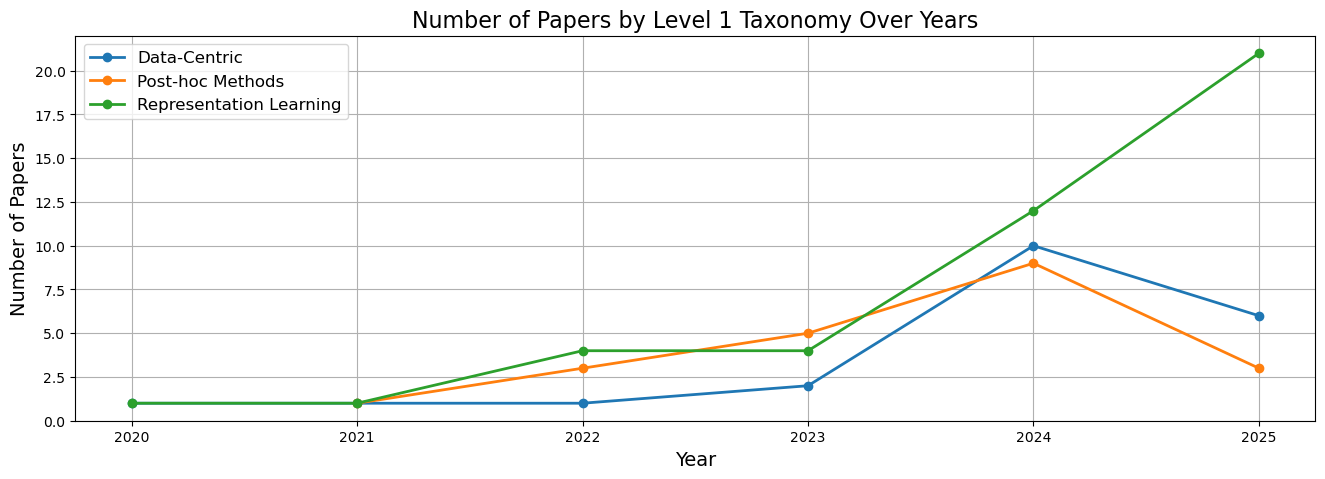

In [31]:
# Plot number of papers by level 1 taxonomy as a function of year
fig, axs = plt.subplots(1, 1, figsize=(16, 5), dpi=100)
for key, grp in df.groupby('Level 1 Taxonomy'):
    grp = grp.sort_values(by='Date')
    grp = grp.groupby(grp['Date'].dt.year).size().reset_index(name='counts')
    axs.plot(grp['Date'], grp['counts'], label=key, marker='o', lw=2)
axs.legend(fontsize=12)
axs.grid()
axs.set_xlabel('Year', fontsize=14)
axs.set_ylabel('Number of Papers', fontsize=14)
axs.set_title('Number of Papers by Level 1 Taxonomy Over Years', fontsize=16)

Text(0.5, 1.0, 'Number of Papers by Level 2 Taxonomy (Representation Learning) Over Years')

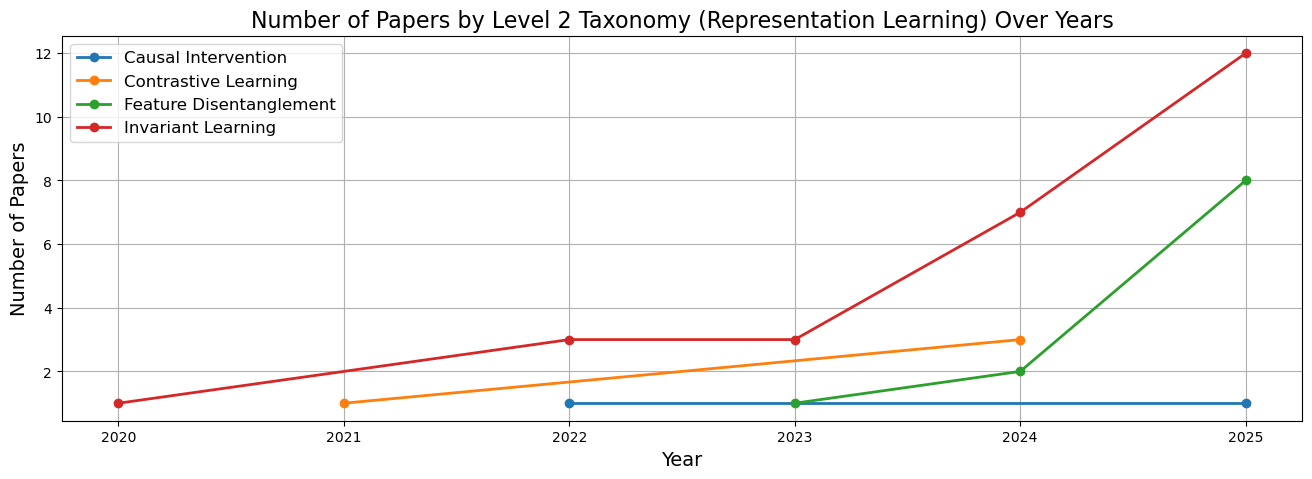

In [32]:
# Plot number of papers by level 2 taxonomy (with representation learning) as a function of year
fig, axs = plt.subplots(1, 1, figsize=(16, 5), dpi=100)
for key, grp in df.query("`Level 1 Taxonomy` == 'Representation Learning'").groupby('Level 2 Taxonomy'):
    grp = grp.sort_values(by='Date')
    grp = grp.groupby(grp['Date'].dt.year).size().reset_index(name='counts')
    axs.plot(grp['Date'], grp['counts'], label=key, marker='o', lw=2)
axs.legend(fontsize=12)
axs.grid()
axs.set_xlabel('Year', fontsize=14)
axs.set_ylabel('Number of Papers', fontsize=14)
axs.set_title('Number of Papers by Level 2 Taxonomy (Representation Learning) Over Years', fontsize=16)

### Which taxonomy branch consistently outperform other branches?

/var/folders/6x/y1zhzhvn299ddgcjncj3kk000000gn/T/ipykernel_59517/770853038.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)


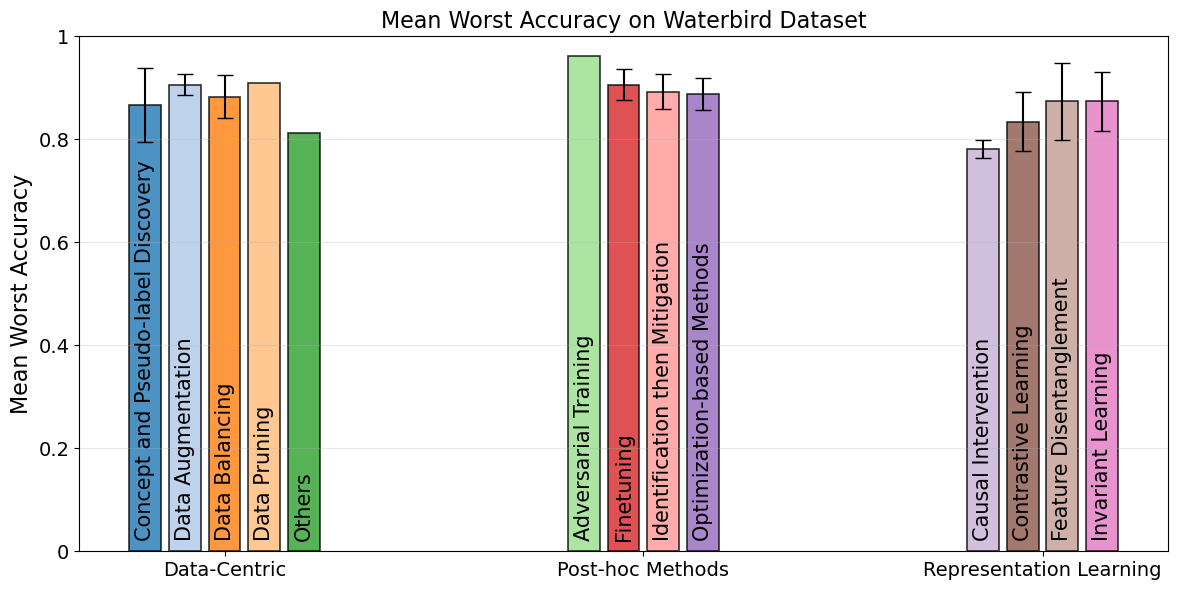

In [58]:
# plot bar chart of mean and standard deviation of Metric by Level 1 Taxonomy
fig, axs = plt.subplots(1, 1, figsize=(12, 6), dpi=100)

# Group by Level 1 and Level 2 taxonomy, calculate mean and std
grouped = df.groupby(['Level 1 Taxonomy', 'Level 2 Taxonomy'])['Metric'].agg(['mean', 'std']).reset_index()

# Get unique Level 1 categories
level1_categories = grouped['Level 1 Taxonomy'].unique()

# Set up bar positions
x_pos = []
bar_width = 0.04
bar_gap = 0.01  # Small gap between bars
current_x = 0

# Create color map for Level 2 categories
all_level2 = grouped['Level 2 Taxonomy'].unique()
colors_map = plt.cm.tab20(range(len(all_level2)))
level2_to_color = dict(zip(all_level2, colors_map))

# Plot grouped bars
level2_handles = {}
for i, level1 in enumerate(level1_categories):
    level1_data = grouped[grouped['Level 1 Taxonomy'] == level1]
    level2_categories = level1_data['Level 2 Taxonomy'].values
    
    # Calculate positions for this group
    n_bars = len(level2_categories)
    group_positions = [current_x + j * (bar_width + bar_gap) for j in range(n_bars)]
    
    for j, level2 in enumerate(level2_categories):
        row = level1_data[level1_data['Level 2 Taxonomy'] == level2].iloc[0]
        bar = axs.bar(group_positions[j], row['mean'], bar_width, 
                     yerr=row['std'], capsize=6,
                     label=level2 if level2 not in level2_handles else "",
                     color=level2_to_color[level2], alpha=0.8,
                     edgecolor='black', linewidth=1.2)
        if level2 not in level2_handles:
            level2_handles[level2] = bar
        
        # Add vertical text label on the bar starting at y=0.05
        axs.text(group_positions[j], 0.02, 
                level2, 
                rotation=90, ha='center', va='bottom', fontsize=15)
    
    # Store the center position for this group
    x_pos.append(current_x + (n_bars - 1) * (bar_width + bar_gap) / 2)
    current_x += n_bars * (bar_width + bar_gap) + 0.3  # Add spacing between groups

# Set x-axis labels
axs.set_xticks(x_pos)
axs.set_xticklabels(level1_categories, rotation=0, ha='center', fontsize=14)
axs.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=14)
# axs.set_xlabel('Level 1 Taxonomy', fontsize=16)
axs.set_ylabel('Mean Worst Accuracy', fontsize=16)
axs.set_title('Mean Worst Accuracy on Waterbird Dataset', fontsize=16)
# axs.legend(title='Level 2 Taxonomy', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
axs.grid(axis='y', alpha=0.3)
axs.set_ylim(0, 1.0)  # Add space for vertical labels
plt.tight_layout()
plt.show()

### What are the top 10 methods by metric?

In [63]:
df.sort_values(by='Metric', ascending=False).loc[:10, ['Level 1 Taxonomy', 'Level 2 Taxonomy', 'Method', 'Metric']]

,Level 1 Taxonomy,Level 2 Taxonomy,Method,Metric
0,Representation Learning,Feature Disentanglement,REPDECOMPOSE and COMPALIGN,0.9780
1,Representation Learning,Invariant Learning,iFAM,0.9740
3,Post-hoc Methods,Adversarial Training,AGRO,0.9610
4,Post-hoc Methods,Identification then Mitigation,TExplain,0.9563
5,Representation Learning,Feature Disentanglement,Group-aware Autoencoder with PCA,0.9400
6,Representation Learning,Invariant Learning,UnLearning from Experience (ULE),0.9360
7,Post-hoc Methods,Finetuning,Controllable Prompt Tuning (CPT),0.9350
8,Representation Learning,Feature Disentanglement,Controllable Feature Whitening (CFW),0.9346
9,Representation Learning,Feature Disentanglement,Freeze then Train (FTT),0.9310
10,Representation Learning,Invariant Learning,Intermediate Layer Classifiers (ILCs),0.9300
